In [205]:
import pandas as pd
import numpy as np

titanic=pd.read_csv('DataSets/titanic.csv')
print('Loaded titanic.csv')

Loaded titanic.csv


In [208]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [209]:
x=titanic['Cabin'].isnull() # Retrieve info about which all are

print("Total records:",len(x))
print("Totla Null Records:",x.sum())
percentage=x.mean()
print("Percentage of null record:{0:.1f}%".format(percentage*100))

# Now remove the indexes whose values are null
titanic.drop('Cabin',1,inplace=True)
# 0 indicates rows, 1 indicates delete columns. 
# Basically 0 deletes tuple, 1 deletes only column.
# inplace=True defines that dropping affects the variable, False defines temporary change.
print("Dropped Values which had 'Cabin' as NULL values.")

Total records: 418
Totla Null Records: 327
Percentage of null record:78.2%
Dropped Values which had 'Cabin' as NULL values.


C:\Users\Anirudh PC\AppData\Local\Temp\ipykernel_13708\1024006223.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  titanic.drop('Cabin',1,inplace=True)


In [210]:
# Imputing the null 'Age' Value
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())

In [211]:
# Impute the Fare value.
# titanic["Fare"].dropna(inplace=True) <- drops all the null values of 'Fare'

print("Mean:",titanic['Fare'].mean(),"Median:",titanic['Fare'].median())

titanic["Fare"]=titanic['Fare'].fillna(titanic['Fare'].median())
print("Filled will median values")
print(titanic['Fare'].isnull().sum())

Mean: 35.627188489208635 Median: 14.4542
Filled will median values
0


In [ ]:
""" 
1. Data Collection
2. EDA(Explorative Data Analysis)
3. Preprocessing(Feature Engineering)
4. Building Model
5. Deployment
"""

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
# %pip install seaborn
import seaborn as sns
df=pd.read_csv('DataSets/titanic.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


<Axes: xlabel='Age', ylabel='Count'>

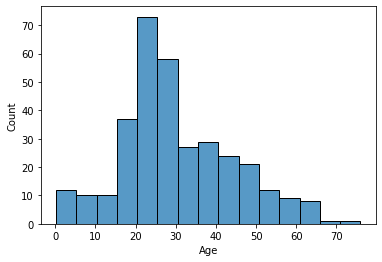

In [213]:
sns.histplot(df.Age)

In [217]:
# Example
q1=17
q3=23
iqr=q3-q1
print('Interquartile Range:',iqr)
max=q3+(1.5*iqr)
min=q1-(1.5*iqr)
print('Maximum:',max)
print('Minimum:',min)

Interquartile Range: 6
Maximum: 32.0
Minimum: 8.0


<Axes: xlabel='Fare'>

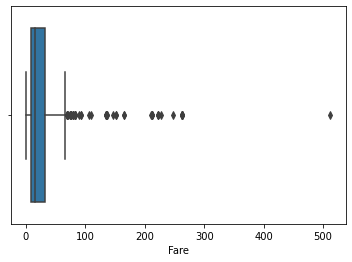

In [218]:
# Boxplot
sns.boxplot(x=titanic.Fare)

<Axes: xlabel='Sex', ylabel='count'>

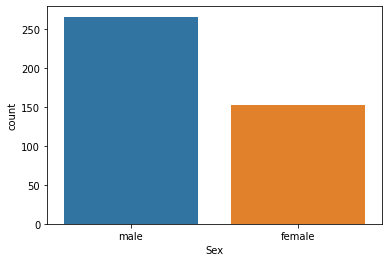

In [222]:
# Countplot for categorical data
sns.countplot(data=titanic,x='Sex')

<Axes: xlabel='Pclass', ylabel='Fare'>

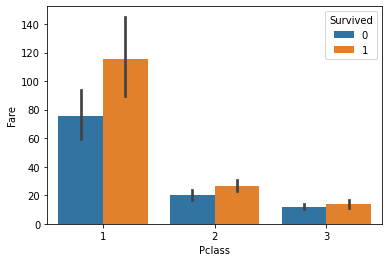

In [227]:
sns.barplot(data=titanic,x='Pclass',y='Fare',hue='Survived')

In [228]:
# Iris data set
iris=pd.read_csv('DataSets/Iris.csv')
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


<Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

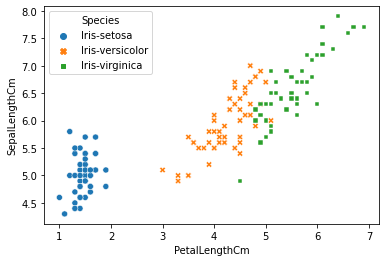

In [238]:
sns.scatterplot(data=iris,x='PetalLengthCm',
y='SepalLengthCm',
hue='Species',
style='Species')